# **Semana 01 - Equipe DS**

# 📥**DS00 - Extração e Carregamento dos Dados**

O objetivo principal deste notebook é fornecer ao time uma base padronizada e validada, pronta para uso nas tarefas da Semana 01:

- Qualidade e Estrutura dos Dados   
- Distribuições e Comportamento das Variáveis  
- Correlações e Relações Entre Variáveis  
- Sazonalidade (Tempo: Mês, Dia, Horário)  
- Segmentação (Companhias & Aeroportos)

In [1]:
# Instalar gdown (baixa arquivos do Google Drive por ID)
!pip install -q gdown
!pip install -q unidecode

# Import de bibliotecas essenciais
import gdown
import os
import zipfile
import pandas as pd
import numpy as np
import glob
import unidecode
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


# style
sns.set(style="whitegrid")

#### Carregamento dos dados

In [2]:
# ID do Dataset
#https://drive.google.com/file/d/1207psedBKvnS0pJkDITroSzPiWrcz0ag/view?usp=sharing
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo que será baixado no Colab
zip_path = "dados_vra.zip"

# Se ainda não existir o zip, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Extrair o conteúdo do zip
extract_folder = "dados_vra"

if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")

Arquivo ZIP já existe, download interrompido.
Pasta de dados já existe.


In [3]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Encontrar arquivos
    caminho_busca = os.path.join(pasta, padrao)
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Ler e validar estrutura
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # Define colunas de referência com o primeiro arquivo
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Compara colunas dos demais arquivos
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Concatenar tudo
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída. \nShape final: {df_final.shape}")

    return df_final


#### Validação do dataset

In [4]:
# Checagem se todos os arquivos serão importados e concatenados
caminho = "/content/dados_vra/dados_vra/VRA_*.csv"

arquivos = glob.glob(caminho)
print(len(arquivos), "arquivos encontrados")

total_linhas = 0
for arq in arquivos:
    df_temp = pd.read_csv(arq, sep=";", skiprows=1, low_memory=False)
    total_linhas += df_temp.shape[0]

print("\nTotal de linhas esperado:", total_linhas)

54 arquivos encontrados

Total de linhas esperado: 3968418


In [5]:
df = carregar_vra(pasta="/content/dados_vra/dados_vra", padrao="VRA_*.csv")
linhas_importadas = df.shape[0]
print("Total de linhas importadas: ", linhas_importadas)


54 arquivos encontrados:
Colunas de referência definidas.


/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404


Concatenação concluída. 
Shape final: (3968418, 12)
Total de linhas importadas:  3968418


In [6]:
if total_linhas == linhas_importadas:
    print("Total de linhas importadas é igual ao total esperado. Prossiga com a analise\n\n\n")
    display(df.head())
else:
    print("Total de linhas importadas é diferente do total esperado. Verifique o código")

Total de linhas importadas é igual ao total esperado. Prossiga com a analise





,ICAO Empresa AÃ©rea,NÃºmero Voo,CÃ³digo AutorizaÃ§Ã£o (DI),CÃ³digo Tipo Linha,ICAO AerÃ³dromo Origem,ICAO AerÃ³dromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,SituaÃ§Ã£o Voo,CÃ³digo Justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


#### Padronização dos Nomes das Variáveis

In [7]:
df.columns

Index(['ICAO Empresa AÃ©rea', 'NÃºmero Voo', 'CÃ³digo AutorizaÃ§Ã£o (DI)',
       'CÃ³digo Tipo Linha', 'ICAO AerÃ³dromo Origem',
       'ICAO AerÃ³dromo Destino', 'Partida Prevista', 'Partida Real',
       'Chegada Prevista', 'Chegada Real', 'SituaÃ§Ã£o Voo',
       'CÃ³digo Justificativa'],
      dtype='object')

In [8]:
df.columns = [c.encode("latin1").decode("utf-8") for c in df.columns]
df.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

In [9]:
mapa_colunas = {
    "ICAO Empresa Aérea" : "empresa_aerea",
    "Número Voo" : "numero_voo",
    "Código Autorização (DI)" : "codigo_autorizacao_di",
    "Código Tipo Linha" : "codigo_tipo_linha",
    "ICAO Aeródromo Origem" : "aerodromo_origem",
    "ICAO Aeródromo Destino" : "aerodromo_destino",
    "Partida Prevista" : "partida_prevista",
    "Partida Real" : "partida_real",
    "Chegada Prevista" : "chegada_prevista",
    "Chegada Real" : "chegada_real",
    "Situação Voo" : "situacao_voo",
    "Código Justificativa" : "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)
df.columns

Index(['empresa_aerea', 'numero_voo', 'codigo_autorizacao_di',
       'codigo_tipo_linha', 'aerodromo_origem', 'aerodromo_destino',
       'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'codigo_justificativa'],
      dtype='object')

#### Dicionário de Variáveis

A tabela abaixo descreve cada coluna do dataset, com seu nome padronizado no notebook, o nome original fornecido pela ANAC e sua definição oficial.

| Nome Padronizado | Nome Original ANAC | Descrição |
|------------------|--------------------|-----------|
| `empresa_aerea` | Sigla ICAO Empresa Aérea | Sigla/designador ICAO da empresa aérea responsável pelo voo. |
| `numero_voo` | Número Voo | Numeração identificadora do voo. |
| `codigo_autorizacao_di` | Código DI | Dígito Identificador (DI) utilizado para identificar a etapa do voo. |
| `codigo_tipo_linha` | Código Tipo Linha | Identifica o tipo de linha/serviço prestado no voo. |
| `aerodromo_origem` | ICAO Aeródromo Origem| Sigla ICAO Aeroporto Origem |
| `aerodromo_destino` | ICAO Aeródromo Destino| Sigla ICAO Aeroporto Destino |
| `partida_prevista` | Partida Prevista | Data e horário programados da partida (horário de Brasília). |
| `partida_real` | Partida Real | Data e horário reais da partida. |
| `chegada_prevista` | Chegada Prevista | Data e horário programados da chegada (horário de Brasília). |
| `chegada_real` | Chegada Real | Data e horário reais da chegada. |
| `situacao_voo` | Situação do voo | Indica se o voo foi realizado, cancelado ou não informado. |
| `codigo_justificativa` | Justificativa | Motivo reportado para irregularidades. Campo descontinuado após abr/2020. |
| `situacao_partida` | Situação Partida | (variavel alvo a ser definida) Categoria de pontualidade da partida (Antecipado, Pontual, Atrasos por faixas). |

Fonte: https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/voo-regular-ativo-vra/62-voo-regular-ativo-vra

#### Exportação dados estruturados

In [10]:
df.to_csv('dataset_estruturado.csv',
          sep=";")

#### Flags de Aleta

In [11]:
# Padronização das variaveis para calculo da situação da partida
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"] = pd.to_datetime(df["partida_real"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [12]:
# Cria colunas para identificar:
df["flag_partida_prevista_ausente"] = df["partida_prevista"].isna()             # voos com partida prevista ausente / nula
df["flag_partida_real_ausente"] = df["partida_real"].isna()                     # voos com partida real ausente / nula
df["flag_aerodromo_origem_ausente"] = df["aerodromo_origem"].isna()             # voos sem o aeroporto de origem

# Cria coluna para identificar os voos fora do periodo de 2021 a 2025
df["flag_data_partida_fora_periodo"] = (
    df["partida_prevista"].notna() &
    ((df["partida_prevista"].dt.year < 2021) |
     (df["partida_prevista"].dt.year > 2025))
)

# Cria coluna para identificar partida real muito antes/depois da prevista
LIMITE_HORAS = 24
delta_h = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 3600  # 3600 é numero de segundos que tem uma hora

df["flag_partida_muito_alto"] = (
    df["partida_prevista"].notna() &
    df["partida_real"].notna() &
    (delta_h.abs() > LIMITE_HORAS)
)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968418 entries, 0 to 3968417
Data columns (total 17 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   empresa_aerea                   object        
 1   numero_voo                      object        
 2   codigo_autorizacao_di           object        
 3   codigo_tipo_linha               object        
 4   aerodromo_origem                object        
 5   aerodromo_destino               object        
 6   partida_prevista                datetime64[ns]
 7   partida_real                    datetime64[ns]
 8   chegada_prevista                object        
 9   chegada_real                    object        
 10  situacao_voo                    object        
 11  codigo_justificativa            float64       
 12  flag_partida_prevista_ausente   bool          
 13  flag_partida_real_ausente       bool          
 14  flag_aerodromo_origem_ausente   bool          
 15

#### Criação da Variável-Alvo

Com base na diferença entre a partida real e prevista, categorizamos cada voo conforme
as regras da ANAC:
- Antecipado
- Pontual
- Atraso 30-60
- Atraso 60-120
- Atraso 120-240
- Atraso > 240

In [14]:
# Calculo da situação da parte conforme dados da ANAC
def classificar_situacao_partida(minutos):
    if minutos < 0:
        return "Antecipado"
    elif minutos <= 15:
        return "Pontual"
    elif minutos <= 60:
        return "Atraso 15-60"
    elif minutos <= 120:
        return "Atraso 60-120"
    elif minutos <= 240:
        return "Atraso 120-240"
    else:
        return "Atraso > 240"

In [15]:
voos_rotulavel = (
    ~df["flag_partida_prevista_ausente"] &
    ~df["flag_partida_real_ausente"] &
    ~df["flag_data_partida_fora_periodo"] &
    ~df["flag_partida_muito_alto"]
)

# Cria a coluna com atraso em minutos
df["atraso_partida_min"] = ((df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60)
df["situacao_partida"] = pd.Series(index=df.index, dtype="object")

# Classifica apenas os voos rotulaveis
df.loc[voos_rotulavel, "situacao_partida"] = (df.loc[voos_rotulavel, "atraso_partida_min"].apply(classificar_situacao_partida))

In [16]:
df = df[df["situacao_partida"].notna()].copy()

In [17]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Atraso 15-60', 'Atraso 60-120',
       'Atraso 120-240', 'Atraso > 240'], dtype=object)

In [18]:
(df["situacao_partida"].value_counts(dropna=False, normalize=True) * 100).round(2)

,proportion
situacao_partida,
Antecipado,55.40
Pontual,28.62
Atraso 15-60,12.52
Atraso 60-120,2.14
Atraso 120-240,0.91
Atraso > 240,0.41


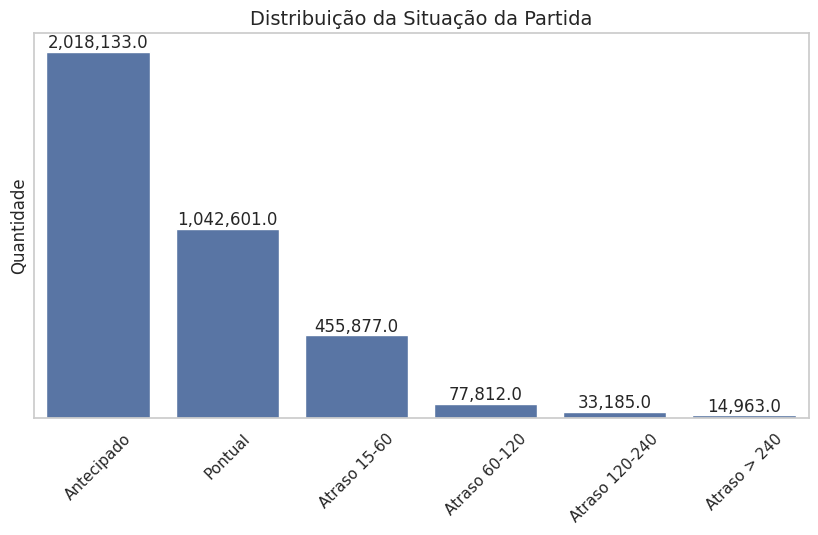

In [19]:
plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [20]:
# Exportando o dataset final (limpo e estruturado)
df.to_csv("dataset_final.csv", sep=";")

# 🛠️**DS01 - Qualidade e Estrutura dos Dados**

O objetivo dessão sessão é fornecer a qualidade e estrutua dos dados para a analise exploratória da Semana 01, como:

  * Verificar tipos de dados de cada coluna
  * Identificar valores ausentes e calcular a porcentagem
  * Detectar valores inválidos, inconsistentes e outliers
  * Criar uma tabela Data Quality Report com: nome da coluna, o tipo, o % de nulos, o problemas encontrados e as possíveis correções
  * Descrever quais colunas exigirão limpeza futura



#### Tipos de dados em cada variavel

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642571 entries, 0 to 3968417
Data columns (total 19 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   empresa_aerea                   object        
 1   numero_voo                      object        
 2   codigo_autorizacao_di           object        
 3   codigo_tipo_linha               object        
 4   aerodromo_origem                object        
 5   aerodromo_destino               object        
 6   partida_prevista                datetime64[ns]
 7   partida_real                    datetime64[ns]
 8   chegada_prevista                object        
 9   chegada_real                    object        
 10  situacao_voo                    object        
 11  codigo_justificativa            float64       
 12  flag_partida_prevista_ausente   bool          
 13  flag_partida_real_ausente       bool          
 14  flag_aerodromo_origem_ausente   bool          
 15  fla

#### Presença de valores ausentes e/ou nulos

In [22]:
# Dataset após o tratamento com flags
nulos = pd.DataFrame({
    'nulos_%': df.isna().mean() * 100
}).sort_values(by='nulos_%', ascending=False)

nulos


,nulos_%
codigo_justificativa,100.000000
chegada_real,0.000055
empresa_aerea,0.000000
codigo_autorizacao_di,0.000000
numero_voo,0.000000
aerodromo_destino,0.000000
codigo_tipo_linha,0.000000
partida_prevista,0.000000
partida_real,0.000000
chegada_prevista,0.000000


#### Detecção de valores invalidos

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
empresa_aerea,3642571,157,AZU,1229575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_voo,3642571,9427,0506,4235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
codigo_autorizacao_di,3642571,12,0,3578046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
codigo_tipo_linha,3642571,5,N,3107134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aerodromo_origem,3642571,411,SBGR,519383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aerodromo_destino,3642571,406,SBGR,521972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partida_prevista,3642571,NaN,NaN,NaN,2023-06-07 11:56:13.980065792,2021-01-01 00:05:00,2022-06-06 20:10:00,2023-06-25 13:10:00,2024-06-30 20:20:00,2025-07-01 07:10:00,NaN
partida_real,3642571,NaN,NaN,NaN,2023-06-07 12:01:50.730365184,2020-12-31 23:51:00,2022-06-06 20:20:30,2023-06-25 13:19:00,2024-06-30 20:24:00,2025-07-01 12:46:00,NaN
chegada_prevista,3642571,470933,2024-02-09 11:00:00,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chegada_real,3642569,1737349,2025-04-07 10:40:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Criação do Report Quality

In [24]:
def count_invalid_strings(s):
    invalid_strings = ['', ' ', 'NA', 'N/A', 'unknown', '?', 'null', 'None']
    if s.dtype == 'object':
        return s.astype(str).str.strip().isin(invalid_strings).sum()
    return 0

def non_numeric_count(s):
    if s.dtype == 'object':
        coerced = pd.to_numeric(s, errors='coerce')
        return coerced.isna().sum() - s.isna().sum()
    return 0

def outlier_count(s):
    if pd.api.types.is_numeric_dtype(s):
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        return ((s < Q1 - 1.5*IQR) | (s > Q3 + 1.5*IQR)).sum()
    return np.nan

In [25]:
# Criação da tabela Data Quality Report com:
        # nome da coluna,
        # o tipo,
        # o % de nulos

def count_invalid_strings(s):
    invalid_strings = ['', ' ', 'NA', 'N/A', 'unknown', '?', 'null', 'None']
    if s.dtype == 'object':
        return s.astype(str).str.strip().isin(invalid_strings).sum()
    return 0


def non_numeric_count(s):
    if s.dtype == 'object':
        coerced = pd.to_numeric(s, errors='coerce')
        return coerced.isna().sum() - s.isna().sum()
    return 0


def outlier_count(s):
    if pd.api.types.is_numeric_dtype(s) and not pd.api.types.is_bool_dtype(s):
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        if IQR == 0 or pd.isna(IQR):
            return 0
        return ((s < Q1 - 1.5*IQR) | (s > Q3 + 1.5*IQR)).sum()
    return 0

report = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'missing_count': df.isna().sum(),
    'missing_%': df.isna().mean() * 100,
    'unique_values': df.nunique(dropna=True)
})

report['invalid_strings'] = df.apply(count_invalid_strings)
report['non_numeric_values'] = df.apply(non_numeric_count)
report['outliers_count'] = df.apply(outlier_count)

In [26]:
report = report.sort_values(
    by=['missing_%', 'invalid_strings', 'outliers_count'],
    ascending=False
)

report

,dtype,missing_count,missing_%,unique_values,invalid_strings,non_numeric_values,outliers_count
codigo_justificativa,float64,3642571,100.000000,0,0,0,0
chegada_real,object,2,0.000055,1737349,0,3642569,0
atraso_partida_min,float64,0,0.000000,2505,0,0,346288
empresa_aerea,object,0,0.000000,157,0,3642571,0
numero_voo,object,0,0.000000,9427,0,4574,0
codigo_autorizacao_di,object,0,0.000000,12,0,43,0
codigo_tipo_linha,object,0,0.000000,5,0,3642571,0
aerodromo_origem,object,0,0.000000,411,0,3642571,0
aerodromo_destino,object,0,0.000000,406,0,3642571,0
partida_prevista,datetime64[ns],0,0.000000,469745,0,0,0


Analise DS01:

* A coluna `codigo_justificativa` deve ser removida pois não apresenta nenhuma informação estatistica. Esta totalmente zerada

* As colunas `numero_voo` e `codigo_autorizacao_di` são colunas utilizadas como identificação do voo, utiliza-las no modelo poderá causar um "overfitting"

* As colunas `chegada_prevista` e `chegada_real` a principio podem ser mantidas no conjunto de dados para fins de analise exploratório, precisando serem convertidas para o formato de data. Para o modelo final elas não devem ser consideradas pois são fatos que acontecem após o momento de previsão do modelo.


* A coluna de `atraso_partida_min` tem uma grande quantidade de valores ausentes que precisam de tratamento.

* A colunas `empresa_aerea`, `aerodromo_origem`, `aerodromo_destino`, `situacao_voo`, `situacao_partida`, `codigo_tipo_linha` tem alto potencial de ser relevantes para o modelo exigindo um tratamento de categorias


# 📊**DS02 - Distribuições e Comportamento das Variáveis**

O objetivo dessa sessão é fornecer a  distribuições e comportamento das variáveis  para a analise exploratória da Semana 01, como:

  * Identificar as variáveis numéricas
  * Criar histogramas para variáveis numéricas
  * Criar boxplots para ver variações e outliers
  * Comparar valores de atraso vs. pontualidade  
  * Observar padrões de concentração, assimetria e dispersão


#### Identificação das variaveis numéricas

In [27]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns
col_cat = df.select_dtypes(include=['object']).columns

print("Variáveis numéricas:", col_num)
print("Variáveis categóricas:", col_cat)

Variáveis numéricas: Index(['codigo_justificativa', 'atraso_partida_min'], dtype='object')
Variáveis categóricas: Index(['empresa_aerea', 'numero_voo', 'codigo_autorizacao_di',
       'codigo_tipo_linha', 'aerodromo_origem', 'aerodromo_destino',
       'chegada_prevista', 'chegada_real', 'situacao_voo', 'situacao_partida'],
      dtype='object')


Como mencionado anteriormente as variaveis `codigo_justificativa` e `numero_voo` são variaveis de identificação que não serão levadas em consideração na analise exploratória.

#### Criação de histogramas para variaveis numéricas

In [28]:
atraso_min_value = df['atraso_partida_min'].min()
atraso_max_value = df['atraso_partida_min'].max()

print(f"Antecipação máxima: {atraso_min_value}")
print(f"Atraso máximo: {atraso_max_value}")

Antecipação máxima: -1440.0
Atraso máximo: 1440.0


Observa-se que existe voos com antecipação ou atrasos de até um dia. Ainda sim, para voos com origem no Brasil, os registros indicando antecipação de 24 horas à data programada não possuem explicação operacional plausível, provavelmente são restrições operacionais, ou erro de digitação no controle dos dados.

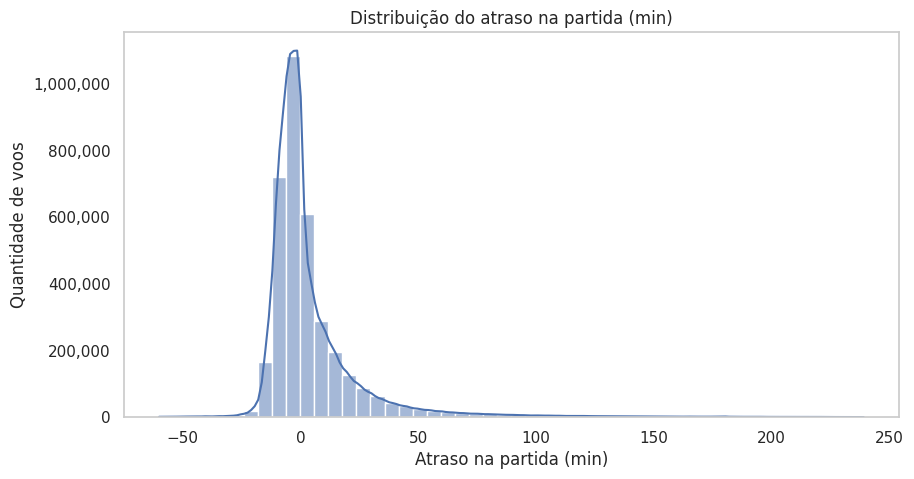

In [29]:
df_atrasados = df[
    df['atraso_partida_min'].notna() &  # somente valores com atraso preenchidos
    (df['atraso_partida_min'] >= -60) &  # com antecipação de até 60 minutos
    (df['atraso_partida_min'] < 240)    # com atraso menor ou igual a 240 minutos
]

plt.figure(figsize=(10, 5))

ax = sns.histplot(
    data=df_atrasados,
    x="atraso_partida_min",
    bins=50,
    stat="count",
    kde=True
)

ax.set_title("Distribuição do atraso na partida (min)")
ax.set_xlabel("Atraso na partida (min)")
ax.set_ylabel("Quantidade de voos")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(False)
plt.show()


Para o gráfico consideramos apenas os voos normais, ou seja, antecipação de até 60 minutos e atrasos de até 240 minutos. O gráfico mostra uma distribuição assimétrica à direita, evidenciando uma maior concentração de voos com atrasos de até aproximadamente 50 minutos. À medida que o tempo de atraso aumenta, a frequência de voos diminui de forma gradual.

#### Criação de boxplots e analise de outliers

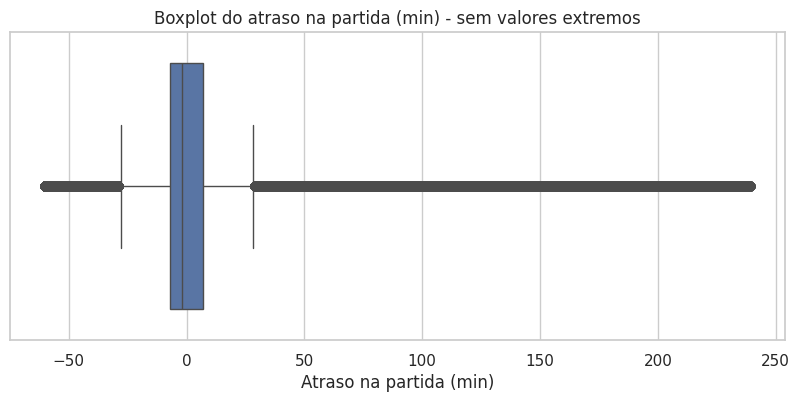

In [30]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_atrasados["atraso_partida_min"])
plt.title("Boxplot do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.show()

Nota-se que metade dos voos está concentrada em uma faixa relativamente curta de atraso, com a mediana situada em valores baixos. O alongamento do bigode superior indica a presença de atrasos mais elevados, enquanto a maior parte dos voos permanece próxima ao comportamento típico.

In [31]:
df_atrasados.groupby('situacao_partida')['atraso_partida_min'].agg(
    media='mean',
    mediana='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)

,media,mediana,q1,q3
situacao_partida,,,,
Antecipado,-6.871507,-6.0,-9.0,-3.0
Atraso 120-240,164.043827,158.0,136.0,186.0
Atraso 15-60,29.585243,26.0,20.0,37.0
Atraso 60-120,83.065106,80.0,69.0,95.0
Pontual,5.207426,4.0,1.0,9.0


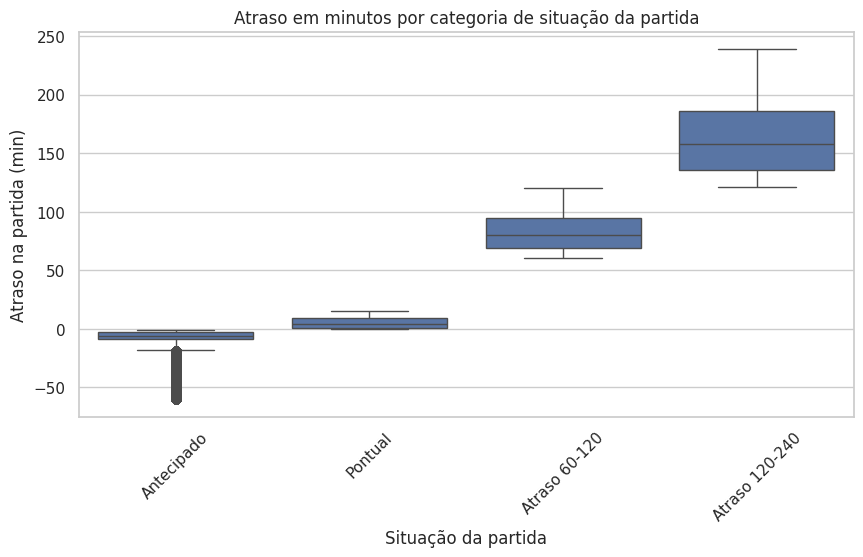

In [32]:

ordem_categorias = [
    "Antecipado",
    "Pontual",
    "Atraso 30-60",
    "Atraso 60-120",
    "Atraso 120-240",
    "Atraso > 240",
    "Nao informado"
]

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_atrasados,
    x="situacao_partida",
    y="atraso_partida_min",
    order=[c for c in ordem_categorias
           if c in df_atrasados["situacao_partida"].unique()]
)

plt.title("Atraso em minutos por categoria de situação da partida")
plt.xlabel("Situação da partida")
plt.ylabel("Atraso na partida (min)")
plt.xticks(rotation=45)
plt.show()


Observa-se no gráfico que, não existe voos com atraso entre 30 e 60 minutos

Os voos com atraso entre 60 e 120 minutos, a mediana é de aproximadamente 80 minutos, e metade dos voos se concentra no intervalo entre 69 e 95 minutos de atraso.

Nos voos com atraso entre 120 e 240 minutos, observa-se maior dispersão dos dados, com mediana em torno de 158 minutos e presença de outliers próximos ao limite superior do intervalo considerado, indicando voos com atrasos mais elevados.

#### Comparação de voos com atrasos e pontuais

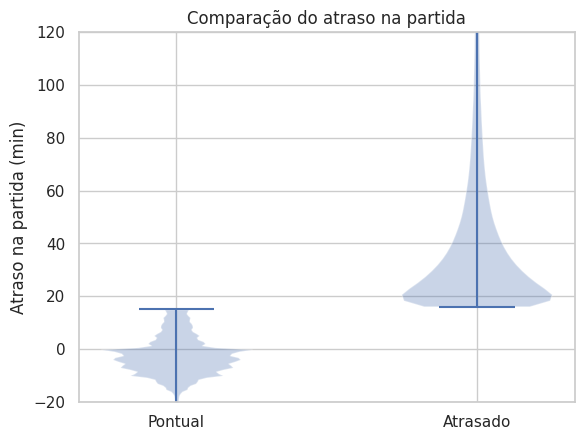

In [33]:
# Separação dos grupos
df_comparacao = df[
    df['atraso_partida_min'].notna() &      # filtra apenas colunas preenchidas
    (df['atraso_partida_min'] >= -60) &     # filtra apenas colunas com pequenas antecipações (até 1 hora)
    (df['atraso_partida_min'] <= 240)       # filtra apenas colunas com atraso de até 240 minutos (até 4 horas)
].copy()


df_comparacao['grupo'] = np.where(                          # cria uma nova colua com situação do voo: "Atrasado" ou "Pontual"
    df_comparacao['atraso_partida_min'] > 15,
    'Atrasado',
    'Pontual'
)

pontual = df_comparacao.loc[df_comparacao['grupo'] == 'Pontual', 'atraso_partida_min']
atrasado = df_comparacao.loc[df_comparacao['grupo'] == 'Atrasado', 'atraso_partida_min']

# Boxplot
plt.figure()
plt.violinplot([pontual, atrasado],    )
plt.ylim(-20, 120)
plt.xticks([1, 2], ['Pontual', 'Atrasado'])
plt.ylabel('Atraso na partida (min)')
plt.title('Comparação do atraso na partida')
plt.show()

É possivel observar nos dados que nos voos pontuais, a maior concentração está próxima de zero e em valores levemente negativos, indicando que a maioria desses voos parte no horário previsto ou com pequena antecedência. A variação é pequena e os atrasos mais elevados são pouco frequentes nesse grupo.

Já nos voos com atraso, observa-se uma concentração maior em valores acima de 15 minutos, com distribuição mais espalhada. Isso indica que, além de atrasos mais altos, esse grupo apresenta maior variabilidade nos tempos de atraso.

# 🧩**DS03 - Correlações e Relações Entre Variáveis**

O objetivo dessa sessão é fornecer as correlaões e relaçoes entre as variavies para a analise exploratória da Semana 01, como:

* Calcular correlação para variáveis numéricas
* Construir heatmap de correlação
* Identificar variáveis redundantes (alta colinearidade)
* Destacar variáveis com maior relação com atraso



#### Calculo da correlação entre variaveis numéricas

In [34]:
# Criando variável dia_semana. seg = 0,dom =6
df['dia_semana'] = df['partida_real'].dt.dayofweek

# Criando variável hora_dia. 0 - 12
df['hora_dia'] = df['partida_real'].dt.hour

# Criando variável mes_ano. 1 -12
df['mes_ano'] = df['partida_real'].dt.month

# Criando variável media_atraso_empresa.
df['media_atraso_empresa'] = df.groupby('empresa_aerea')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_origem.
df['media_atraso_origem'] = df.groupby('aerodromo_origem')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_destino.
df['media_atraso_destino'] = df.groupby('aerodromo_destino')['atraso_partida_min'].transform('mean')

df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano','media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']].head()

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
0,-4.0,5,20,1,3.780994,8.762378,4.813536
1,-1.0,6,20,1,3.780994,8.762378,4.813536
2,2.0,0,20,1,3.780994,8.762378,4.813536
3,-1.0,1,20,1,3.780994,8.762378,4.813536
4,-9.0,2,20,1,3.780994,8.762378,4.813536


In [35]:
# Unindo as variáveis numéricas.
df_num = df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano', 'media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']]
df_num.describe()

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
count,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06
mean,5.612505e+00,2.922528e+00,1.285039e+01,6.278736e+00,5.612505e+00,5.612505e+00,5.612505e+00
std,5.821978e+01,1.981435e+00,5.865025e+00,3.483275e+00,1.251817e+01,6.859005e+00,6.632259e+00
min,-1.440000e+03,0.000000e+00,0.000000e+00,1.000000e+00,-3.872727e+02,-4.333333e+02,-1.440000e+03
25%,-7.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,3.114095e+00,2.999485e+00,3.009839e+00
50%,-2.000000e+00,3.000000e+00,1.300000e+01,6.000000e+00,3.780994e+00,4.272243e+00,4.518191e+00
75%,7.000000e+00,5.000000e+00,1.800000e+01,9.000000e+00,4.096316e+00,7.803720e+00,6.714184e+00
max,1.440000e+03,6.000000e+00,2.300000e+01,1.200000e+01,3.956667e+02,1.019000e+03,8.350000e+02


In [36]:
# Criar a matriz de correlação.
matriz_correlacao = df_num.corr()
matriz_correlacao

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
atraso_partida_min,1.000000,-0.003304,0.052019,0.017541,0.215016,0.117812,0.113918
dia_semana,-0.003304,1.000000,0.003145,0.002712,0.005108,0.005356,0.006821
hora_dia,0.052019,0.003145,1.000000,0.001688,0.004556,0.038890,0.019356
mes_ano,0.017541,0.002712,0.001688,1.000000,-0.003785,-0.002553,-0.001592
media_atraso_empresa,0.215016,0.005108,0.004556,-0.003785,1.000000,0.359737,0.364920
media_atraso_origem,0.117812,0.005356,0.038890,-0.002553,0.359737,1.000000,0.183811
media_atraso_destino,0.113918,0.006821,0.019356,-0.001592,0.364920,0.183811,1.000000


#### Construção do heatmap de correlação

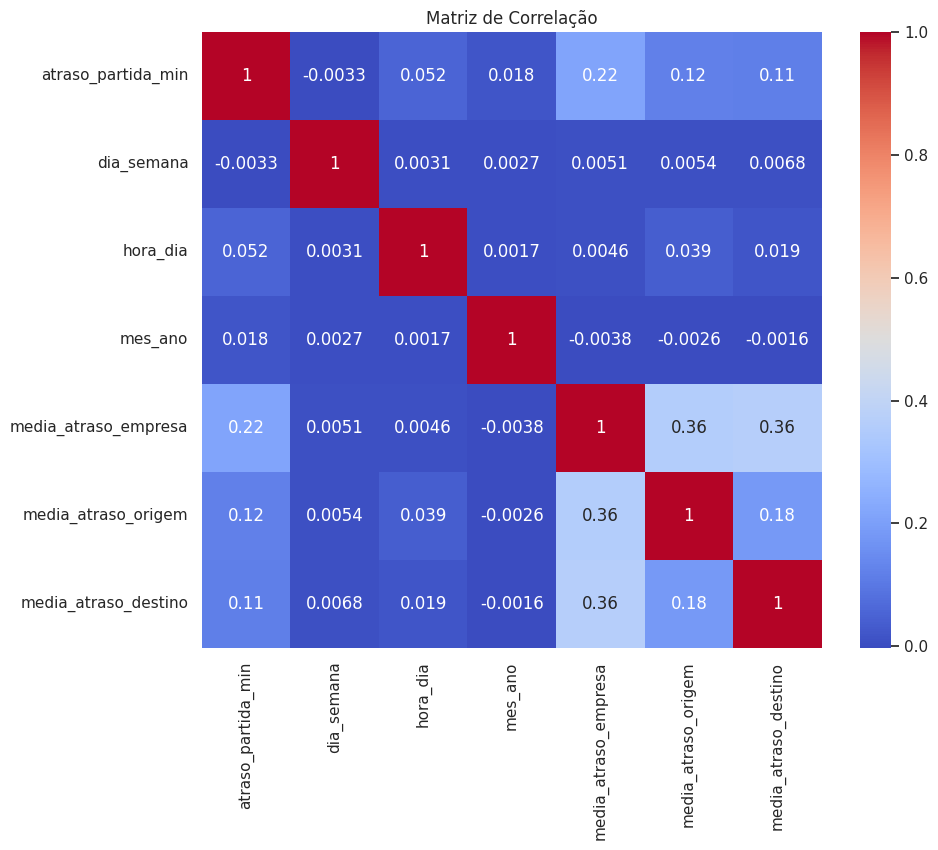

In [37]:
# Criando o gráfico da matriz de correlação.
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

A matriz de correlação mostra que não existe uma relação linear forte entre o atraso na partida dos voos e as variáveis de tempo analisadas, como dia da semana, horário do dia ou mês do ano. Os valores de correlação próximos de zero indicam que, isoladamente, esses fatores não explicam bem o comportamento dos atrasos, o que já era esperado, já que atrasos de voo dependem de diversos fatores operacionais que atuam de forma conjunta.

Por outro lado, as variáveis que representam o atraso médio por empresa aérea e por aeroportos (origem e destino) apresentam correlações um pouco mais elevadas entre si. Isso sugere que existe um padrão operacional compartilhado: empresas costumam operar com mais frequência em determinados aeroportos, e aeroportos com maior histórico de atrasos tendem a impactar diferentes companhias. Ainda assim, essas correlações são moderadas e não indicam redundância excessiva entre as variáveis.

A análise reforça que o atraso na partida é um fenômeno complexo e multifatorial, que não pode ser explicado por uma única variável. Isso indica que modelos que consigam capturar interações entre múltiplos fatores, especialmente abordagens não lineares, tendem a ser mais adequados para esse tipo de problema.

#### Construção de variaveis numéricas ciclicas

In [38]:
df_ciclico = df.copy()

hora_ciclica = df_ciclico["partida_prevista"].dt.hour
dia_ciclico  = df_ciclico["partida_prevista"].dt.dayofweek
mes_ciclico  = df_ciclico["partida_prevista"].dt.month

# Criação de variaveis ciclicas
df_ciclico["hora_sin"] = np.sin(2*np.pi * hora_ciclica / 24)
df_ciclico["hora_cos"] = np.cos(2*np.pi * hora_ciclica / 24)
df_ciclico["dia_ciclico_sin"]  = np.sin(2*np.pi * dia_ciclico  / 7)
df_ciclico["dia_ciclico_cos"]  = np.cos(2*np.pi * dia_ciclico  / 7)
df_ciclico["mes_ciclico_sin"]  = np.sin(2*np.pi * (mes_ciclico-1) / 12)
df_ciclico["mes_ciclico_cos"]  = np.cos(2*np.pi * (mes_ciclico-1) / 12)

In [39]:
cols_ciclicas_num = df_ciclico.select_dtypes(include=['int64', 'float64']).columns
print("Variáveis numéricas:", cols_ciclicas_num)

Variáveis numéricas: Index(['codigo_justificativa', 'atraso_partida_min', 'media_atraso_empresa',
       'media_atraso_origem', 'media_atraso_destino', 'hora_sin', 'hora_cos',
       'dia_ciclico_sin', 'dia_ciclico_cos', 'mes_ciclico_sin',
       'mes_ciclico_cos'],
      dtype='object')


In [40]:
df_ciclico_num = df_ciclico[['atraso_partida_min','hora_sin', 'hora_cos', 'dia_ciclico_sin', 'dia_ciclico_cos', 'mes_ciclico_sin', 'mes_ciclico_cos']]
df_num.describe()

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
count,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06,3.642571e+06
mean,5.612505e+00,2.922528e+00,1.285039e+01,6.278736e+00,5.612505e+00,5.612505e+00,5.612505e+00
std,5.821978e+01,1.981435e+00,5.865025e+00,3.483275e+00,1.251817e+01,6.859005e+00,6.632259e+00
min,-1.440000e+03,0.000000e+00,0.000000e+00,1.000000e+00,-3.872727e+02,-4.333333e+02,-1.440000e+03
25%,-7.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,3.114095e+00,2.999485e+00,3.009839e+00
50%,-2.000000e+00,3.000000e+00,1.300000e+01,6.000000e+00,3.780994e+00,4.272243e+00,4.518191e+00
75%,7.000000e+00,5.000000e+00,1.800000e+01,9.000000e+00,4.096316e+00,7.803720e+00,6.714184e+00
max,1.440000e+03,6.000000e+00,2.300000e+01,1.200000e+01,3.956667e+02,1.019000e+03,8.350000e+02


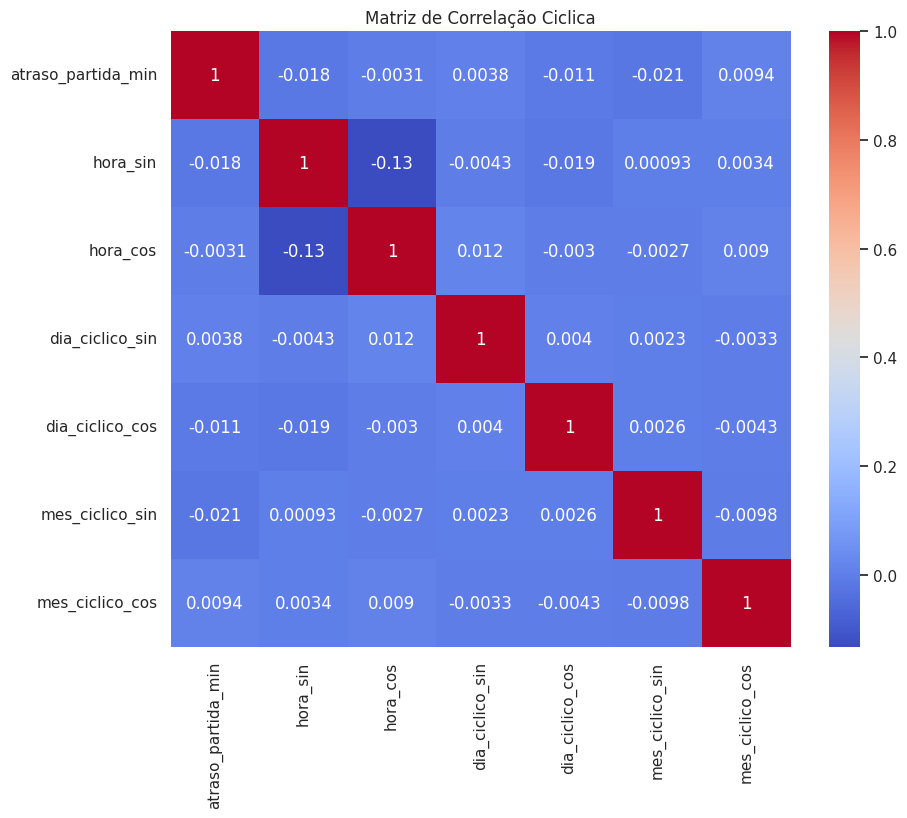

In [41]:
corr_ciclica = df_ciclico_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_ciclica, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação Ciclica')
plt.show()

Na primeira matriz de correlação, as variáveis temporais foram representadas de forma direta, como números inteiros (dia da semana, hora do dia e mês do ano). Nessa abordagem, os valores de correlação com o atraso na partida ficaram muito próximos de zero. Isso acontece porque o tempo, na prática, não se comporta de forma linear. Por exemplo, o horário 23h e o horário 0h são tratados como valores distantes numericamente, quando na realidade eles são consecutivos no ciclo do dia.

Na segunda matriz, as mesmas informações temporais foram representadas de forma cíclica, utilizando funções seno e cosseno. Essa transformação respeita a natureza circular do tempo, fazendo com que pontos próximos no ciclo (como o final e o início do dia ou do mês) também fiquem próximos na representação numérica. Com isso, a relação entre as variáveis temporais passa a ser descrita de maneira mais coerente com o fenômeno real.

Mesmo que os valores de correlação com o atraso continuem baixos, a diferença entre as duas matrizes está na qualidade da representação do tempo, e não no aumento imediato da correlação linear. A matriz cíclica não tem como objetivo “forçar” uma correlação maior, mas sim evitar distorções que surgem quando variáveis temporais são tratadas como números lineares.

Em resumo, a comparação entre as duas matrizes mostra que a codificação cíclica não muda drasticamente os coeficientes de correlação, mas oferece uma representação mais adequada do comportamento temporal dos dados, o que tende a ser melhor aproveitado por modelos preditivos, especialmente aqueles capazes de capturar relações não lineares.

# ⏱️**DS4 – Sazonalidade**

O objetivo dessa sessão é fornecer informações sobre a sazionalidade para a analise exploratória da Semana 01, como:

* Calcular atraso por mês do ano
* Atraso por dia da semana
* Atraso por horário do dia
* Criar gráficos de linha para mostrar tendências temporais
* Identificar picos de demanda e sazonalidade



#### Calculo do atraso por mês do ano

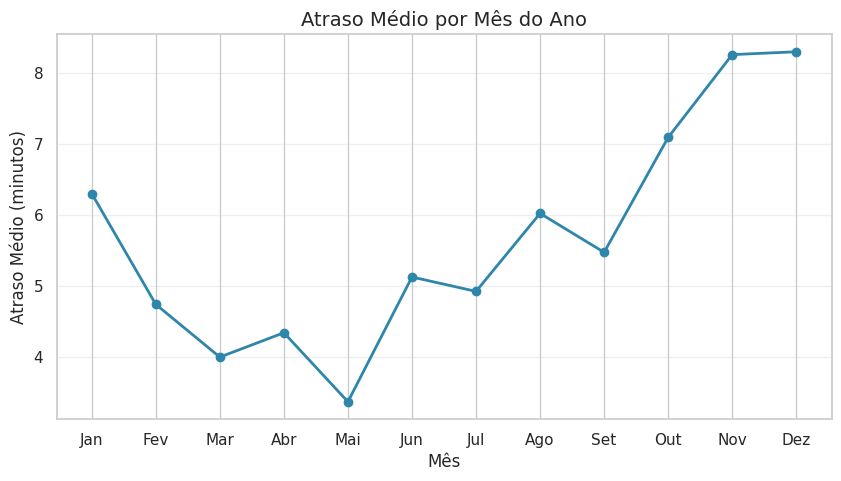

In [42]:
# Atraso médio por mês
atraso_por_mes = df.groupby('mes_ano')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_mes.index, atraso_por_mes.values, marker='o', linewidth=2, color='#2E86AB')
plt.title('Atraso Médio por Mês do Ano', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()


O gráfico mosta que o atraso médio na partida não é constante ao longo do ano. Nos primeiros meses, especialmente em fevereiro e maio, os atrasos tendem a ser menores. A partir do meio do ano, percebe-se um crescimento gradual nesses valores. O pico de atraso ocorre no final do ano, principalmente entre outubro e dezembro, sugerindo a presença de sazonalidade no comportamento dos atrasos dos voos.

#### Calculo do atraso por dia da semana

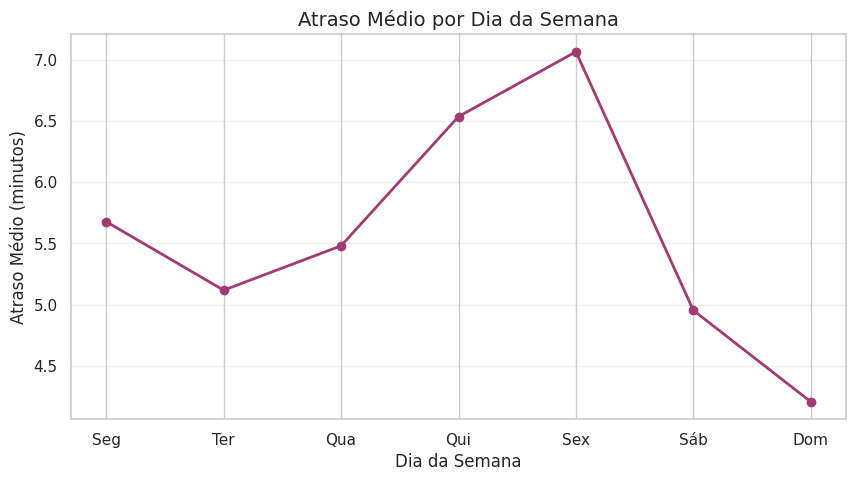

In [43]:
# Atraso médio por dia da semana
atraso_por_dia = df.groupby('dia_semana')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_dia.index, atraso_por_dia.values, marker='o', linewidth=2, color='#A23B72')
plt.title('Atraso Médio por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(axis='y', alpha=0.3)
plt.show()

O gráfico mostra que no início da semana, especialmente na terça-feira, os atrasos tendem a ser menores. A partir de quarta-feira, os valores começam a aumentar, atingindo o pico na sexta-feira. No sábado, o atraso ainda é relativamente alto, mas já apresenta queda. No domingo, observa-se o menor atraso médio da semana

#### Calculo do atraso por horário do dia

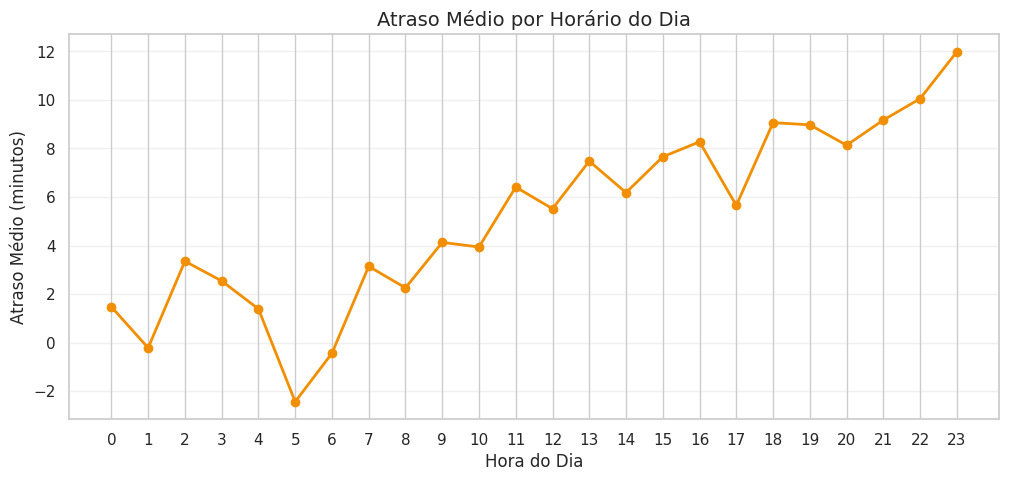

In [44]:
# Atraso médio por horário
atraso_por_horario = df.groupby('hora_dia')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(12, 5))
plt.plot(atraso_por_horario.index, atraso_por_horario.values, marker='o', linewidth=2, color='#F18F01')
plt.title('Atraso Médio por Horário do Dia', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

Os atrasos médios tendem a ser menores durante a madrugada e no início da manhã. Observa-se que, entre 5h e 6h, os voos tendem a ser antecipados, apresentando valores negativos de atraso. A partir do final da manhã, os atrasos começam a aumentar gradualmente ao longo do dia. No período da tarde, percebe-se uma elevação mais consistente dos atrasos médios. O pico ocorre à noite, especialmente entre 21h e 23h, sugerindo um acúmulo de atrasos conforme a operação se torna mais congestionada ao longo do dia.

#### Tendencias temporais

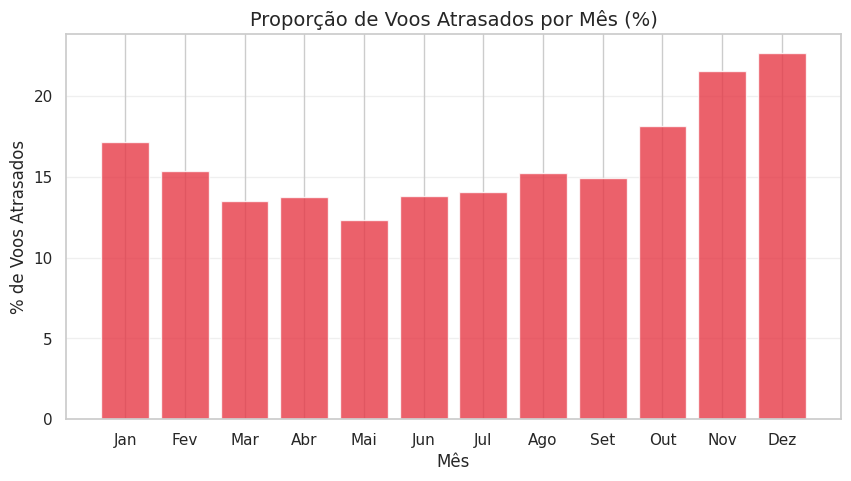

In [45]:
# Criar coluna binária: atrasado = 1 se atraso > 15 min
df['atrasado'] = (df['atraso_partida_min'] > 15).astype(int)

# Proporção de atrasos por mês
prop_atraso_mes = df.groupby('mes_ano')['atrasado'].mean() * 100

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(prop_atraso_mes.index, prop_atraso_mes.values, color='#E63946', alpha=0.8)
plt.title('Proporção de Voos Atrasados por Mês (%)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('% de Voos Atrasados')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()

O gráfico apresenta a proporção de voos atrasados ao longo dos meses do ano e evidencia um padrão sazonal bem definido. No início do ano, especialmente em janeiro e fevereiro, a taxa de atrasos já se mostra relativamente elevada. Nos meses seguintes, observa-se uma redução gradual, com os menores percentuais concentrados entre março e maio. A partir de junho, a proporção de voos atrasados volta a crescer de forma consistente. Esse aumento se torna mais evidente a partir de agosto, indicando maior pressão operacional. Nos últimos meses do ano, especialmente em outubro, novembro e dezembro, os atrasos atingem seus níveis mais altos. Esse comportamento sugere que o aumento da demanda, aliado a fatores operacionais e climáticos, contribui para a intensificação dos atrasos no final do ano.

# ✈️**DS05 - Segmentação**

O objetivo dessa sessão é fornecer informaçoes sobre a segmentaçao dos dados para a analise exploratória da Semana 01, como:

* Ranking das companhias com maior taxa de atraso
* Ranking dos aeroportos com mais atrasos (origem/destino)
* Comparar desempenho entre diferentes regiões do país
* Identificar gargalos e padrões específicos em companhias e aeroportos


#### Ranking das companhias com maior taxa de atraso

In [46]:
total_voos = df.groupby('empresa_aerea').size().reset_index(name='total_voos')
voos_atrasados = df[df['atraso_partida_min'] > 0].groupby('empresa_aerea').size().reset_index(name='voos_atrasados')

ranking = total_voos.merge(voos_atrasados, on='empresa_aerea', how='left')
ranking.sort_values(by="voos_atrasados", ascending=False)

,empresa_aerea,total_voos,voos_atrasados
30,AZU,1229575,425595.0
135,TAM,1012386,374095.0
67,GLO,874565,326415.0
136,TAP,33067,24035.0
43,CMP,28609,23409.0
...,...,...,...
62,EVE,6,NaN
97,MEM,6,NaN
120,RUN,10,NaN
146,TVS,2,NaN


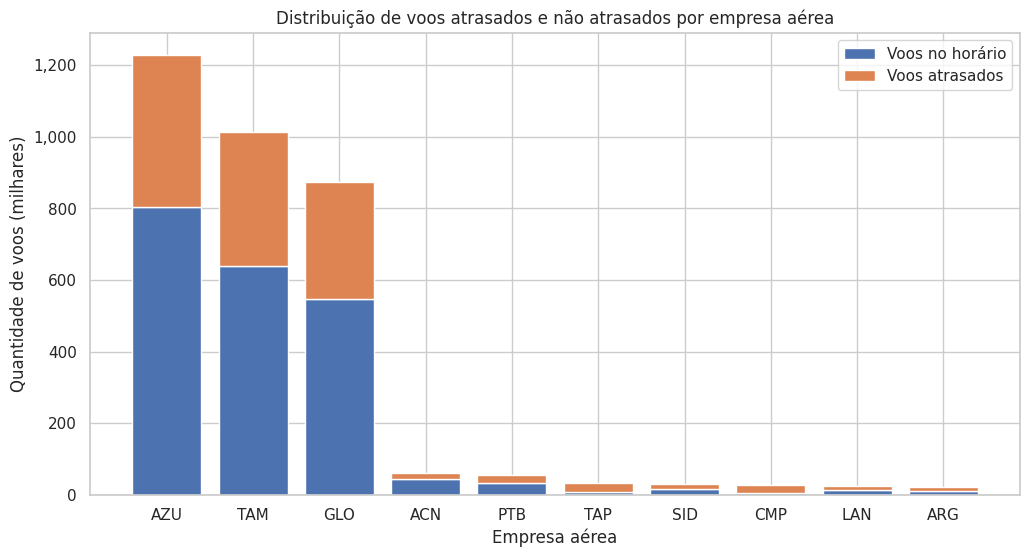

In [47]:
top_n = 10
ranking_top = ranking.sort_values(
    "total_voos", ascending=False
).head(top_n)

ranking_top["voos_atrasados"] = ranking_top["voos_atrasados"].fillna(0)
ranking_top["voos_nao_atrasados"] = (
    ranking_top["total_voos"] - ranking_top["voos_atrasados"]
)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(
    ranking_top["empresa_aerea"],
    ranking_top["voos_nao_atrasados"],
    label="Voos no horário"
)

ax.bar(
    ranking_top["empresa_aerea"],
    ranking_top["voos_atrasados"],
    bottom=ranking_top["voos_nao_atrasados"],
    label="Voos atrasados"
)

ax.set_ylabel("Quantidade de voos (milhares)")
ax.set_xlabel("Empresa aérea")
ax.set_title("Distribuição de voos atrasados e não atrasados por empresa aérea")

# 🔹 formata eixo Y para milhares
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{int(x/1_000):,}")
)

ax.legend()
plt.show()


In [48]:
ranking['voos_atrasados'] = ranking['voos_atrasados'].fillna(0)
ranking['taxa_atraso'] = (round(ranking['voos_atrasados'] / ranking['total_voos'], 2))
ranking_final = ranking.sort_values('taxa_atraso', ascending=False).reset_index(drop=True)
ranking_final



,empresa_aerea,total_voos,voos_atrasados,taxa_atraso
0,1DE,2,2.0,1.0
1,1ED,5,5.0,1.0
2,ACL,5,5.0,1.0
3,ARL,1,1.0,1.0
4,ARN,4,4.0,1.0
...,...,...,...,...
152,ETD,12,0.0,0.0
153,RUN,10,0.0,0.0
154,MEM,6,0.0,0.0
155,TVS,2,0.0,0.0


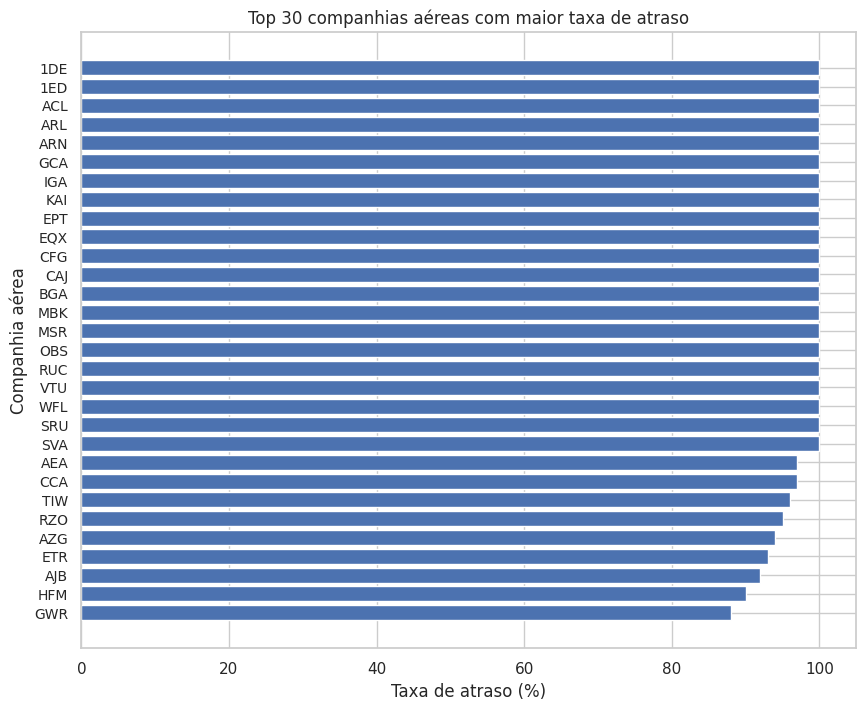

In [49]:
top_empresas = (ranking.sort_values('taxa_atraso', ascending=False).head(30))

plt.figure(figsize=(10, 8))
plt.barh(top_empresas['empresa_aerea'], top_empresas['taxa_atraso'] * 100)
plt.xlabel('Taxa de atraso (%)')
plt.ylabel('Companhia aérea')
plt.yticks(fontsize=10)
plt.title('Top 30 companhias aéreas com maior taxa de atraso')
plt.gca().invert_yaxis()
plt.show()

O primeiro gráfico mostra, em números absolutos, quantos voos cada empresa realizou e quantos desses voos tiveram atraso. Nele, é possível perceber que as companhias que operam mais voos acabam concentrando também um maior número de atrasos, o que é esperado pelo volume de operações.

Já o segundo gráfico apresenta uma visão diferente, focando na porcentagem de voos atrasados em cada empresa. Essa comparação ajuda a entender que uma empresa pode ter poucos voos no total, mas ainda assim apresentar uma taxa de atraso elevada.

Juntos, os dois gráficos mostram que analisar apenas a quantidade de atrasos pode ser enganoso, e que é importante considerar tanto o volume de voos quanto a proporção de atrasos para ter uma visão mais justa do desempenho das companhias aéreas.

#### Ranking  dos aeroportos com mais atrasos

In [50]:
df['atrasado'].unique()

array([0, 1])

In [51]:
total_voos_origem = (df.groupby('aerodromo_origem').size().reset_index(name='total_voos'))
voos_atrasados_origem = (df[df['atrasado'] == 1].groupby('aerodromo_origem').size().reset_index(name='voos_atrasados'))
ranking_origem = total_voos_origem.merge(voos_atrasados_origem, on='aerodromo_origem', how='left')
ranking_origem['voos_atrasados'] = ranking_origem['voos_atrasados'].fillna(0)
ranking_origem

,aerodromo_origem,total_voos,voos_atrasados
0,CYHM,5,1.0
1,CYMX,21,8.0
2,CYUL,774,371.0
3,CYXX,1,1.0
4,CYYT,1,0.0
...,...,...,...
406,ZBAA,118,110.0
407,ZGGG,1,0.0
408,ZGSZ,1,0.0
409,ZHCC,1,1.0


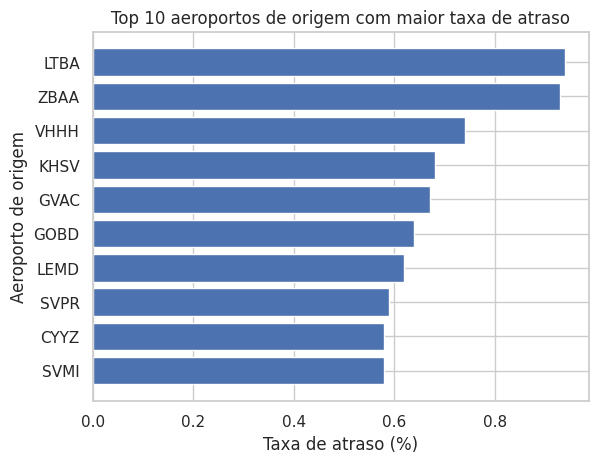

In [52]:
# Calculo da taxa de atraso
ranking_origem['taxa_atraso'] = (round(ranking_origem['voos_atrasados'] / ranking_origem['total_voos'], 2))

# Ordenar pelo maior índice de atraso
ranking_origem = ranking_origem.sort_values(by='taxa_atraso', ascending=False)

# Remover aeroportos com pouco volume
ranking_origem = ranking_origem[ranking_origem['total_voos'] >= 50]
top10_origem = ranking_origem.head(10)

# Gráfico
plt.figure()
plt.barh(top10_origem['aerodromo_origem'], top10_origem['taxa_atraso'])
plt.xlabel('Taxa de atraso (%)')
plt.ylabel('Aeroporto de origem')
plt.title('Top 10 aeroportos de origem com maior taxa de atraso')
plt.gca().invert_yaxis()
plt.show()

#### Identificar gargalos e padrões específicos em companhias e aeroportos

In [53]:
# Taxa de atraso por aeroporto e companhia (origem)
aero_companhia_origem = (df.groupby(['aerodromo_origem', 'empresa_aerea']).agg(total_voos=('numero_voo', 'count'), voos_atrasados=('atrasado', 'sum')).reset_index())

# Calcular taxa de atraso
aero_companhia_origem['taxa_atraso'] = (aero_companhia_origem['voos_atrasados'] / aero_companhia_origem['total_voos'])

# Aeroportos onde múltiplas companhias têm taxa alta
# Critério exemplo:
# ≥ 3 companhias
# taxa de atraso ≥ 30%
# ≥ 50 voos

gargalos_aeroportos = (aero_companhia_origem[(aero_companhia_origem['taxa_atraso'] >= 0.3) &
                      (aero_companhia_origem['total_voos'] >= 50)]
                      .groupby('aerodromo_origem').size().reset_index(name='companhias_afetadas').sort_values('companhias_afetadas', ascending=False))

gargalos_aeroportos

,aerodromo_origem,companhias_afetadas
55,SBGR,21
24,KMIA,12
41,SAEZ,8
50,SBEG,8
54,SBGL,8
...,...,...
91,SWPI,1
92,SWTS,1
93,SWYN,1
94,SYCJ,1


Para combinar informações de aeroportos de origem e companhias aéreas e identificar possíveis gargalos operacionais de forma mais objetiva, calculamos a taxa de atraso de cada companhia em cada aeroporto e aplicamos filtros mínimos de volume de voos, garantindo que os resultados não fossem influenciados por casos pontuais ou operações muito pequenas.

Os resultados mostram que alguns aeroportos concentram atrasos em várias companhias diferentes ao mesmo tempo. Um exemplo claro é o aeroporto de SBGR (Aeroporto Internacional de Guarulhos), que aparece com um número significativamente maior de companhias afetadas, indicando que o problema vai além da performance individual das empresas. Quando várias companhias, com volumes relevantes de operação, apresentam taxas de atraso elevadas no mesmo aeroporto, isso pode sugerir a presença de fatores estruturais ou operacionais, como congestionamento, limitações de infraestrutura ou impactos recorrentes de clima e logística.

Além disso, a presença de aeroportos internacionais e hubs importantes entre os primeiros colocados reforça a hipótese de que aeroportos com maior complexidade operacional tendem a concentrar gargalos sistêmicos. Esses achados ajudam a diferenciar atrasos causados por decisões operacionais das companhias daqueles associados ao ambiente aeroportuário, oferecendo uma visão mais equilibrada do problema e apontando onde intervenções estruturais podem ter maior impacto na redução dos atrasos.

In [54]:
# Taxa de atraso por companhia e aeroporto
companhia_aero_origem = (df.groupby(['empresa_aerea', 'aerodromo_origem']).agg(total_voos=('numero_voo', 'count'), voos_atrasados=('atrasado', 'sum')).reset_index())
companhia_aero_origem['taxa_atraso'] = (companhia_aero_origem['voos_atrasados'] / companhia_aero_origem['total_voos'])

# Companhias com múltiplos aeroportos críticos
gargalos_companhias = (companhia_aero_origem[(companhia_aero_origem['taxa_atraso'] >= 0.3) &
                      (companhia_aero_origem['total_voos'] >= 50)]
                      .groupby('empresa_aerea').size().reset_index(name='aeroportos_criticos').sort_values('aeroportos_criticos', ascending=False))

gargalos_companhias.head(10)

,empresa_aerea,aeroportos_criticos
37,LTG,16
34,LCO,15
32,LAE,9
43,PTB,9
42,PAM,8
52,TAP,7
53,THY,7
13,CLX,7
39,MPH,6
4,AFR,5


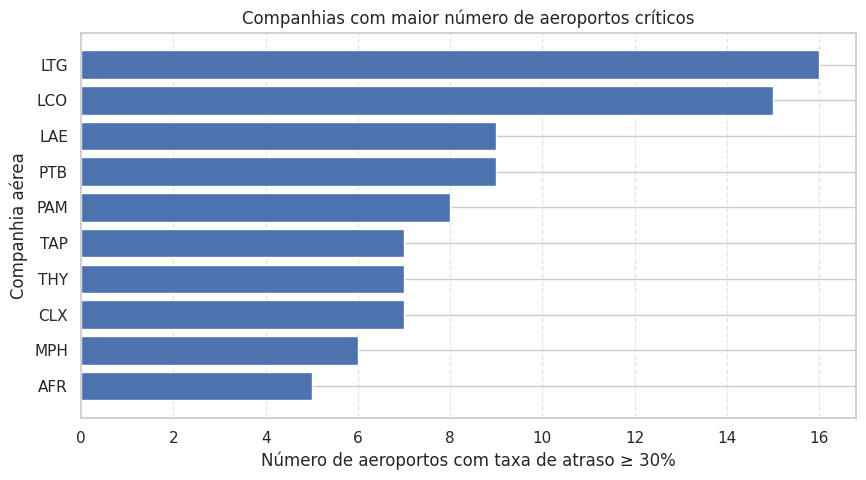

In [55]:
top_n = 10
plot = gargalos_companhias.head(top_n)


plt.figure(figsize=(10, 5))
plt.barh(plot["empresa_aerea"], plot["aeroportos_criticos"])

plt.xlabel("Número de aeroportos com taxa de atraso ≥ 30%")
plt.ylabel("Companhia aérea")
plt.title("Companhias com maior número de aeroportos críticos")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


Quando uma companhia aparece com vários aeroportos críticos, como é o caso das empresas no topo do ranking (por exemplo, LCO, TAP e MPH), isso indica que o atraso não está concentrado em um único aeroporto específico. Em vez disso, o comportamento se repete em diferentes localidades, sugerindo fatores ligados à própria operação da companhia, como planejamento de malha, gestão de frota, turnarounds apertados ou estratégias de horário.

Por outro lado, companhias com poucos aeroportos críticos podem até enfrentar atrasos relevantes, mas de forma mais localizada, possivelmente associados a aeroportos específicos ou contextos operacionais particulares.

In [56]:
# Taxa de atraso por faixa horária
gargalo_horario = (df.groupby('hora_dia').agg(total_voos=('numero_voo', 'count'), voos_atrasados=('atrasado', 'sum')))
gargalo_horario['taxa_atraso'] = (gargalo_horario['voos_atrasados'] / gargalo_horario['total_voos'])

gargalo_horario.head(24)

,total_voos,voos_atrasados,taxa_atraso
hora_dia,,,
0,43750,15564,0.355749
1,36262,8281,0.228366
2,64820,9080,0.140080
3,71285,9918,0.139132
4,75318,7884,0.104676
5,137436,7195,0.052352
6,160360,11571,0.072156
7,129808,13995,0.107813
8,251930,23139,0.091847


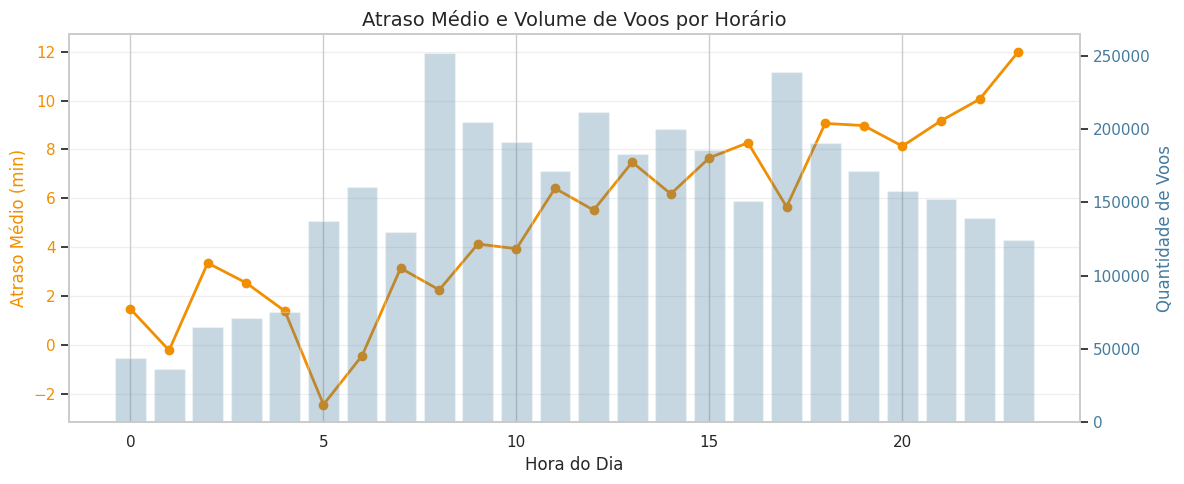

In [57]:
# Atraso acumulado ao longo do dia
atraso_acumulado = df.groupby('hora_dia')['atraso_partida_min'].agg(['mean', 'count'])

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(atraso_acumulado.index, atraso_acumulado['mean'], marker='o', color='#F18F01', linewidth=2, label='Atraso Médio')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Atraso Médio (min)', color='#F18F01')
ax1.tick_params(axis='y', labelcolor='#F18F01')
ax1.grid(axis='y', alpha=0.3)

ax2 = ax1.twinx()
ax2.bar(atraso_acumulado.index, atraso_acumulado['count'], alpha=0.3, color='#457B9D', label='Quantidade de Voos')
ax2.set_ylabel('Quantidade de Voos', color='#457B9D')
ax2.tick_params(axis='y', labelcolor='#457B9D')

plt.title('Atraso Médio e Volume de Voos por Horário', fontsize=14)
fig.tight_layout()

plt.grid(False)
plt.show()

O gráfico combina duas informações importantes ao longo do dia: o atraso médio na partida e o volume de voos por horário. Durante a madrugada e no início da manhã, o número de voos ainda é baixo e os atrasos tendem a ser menores, com alguns horários apresentando até partidas antecipadas.

Conforme o dia avança, o volume de voos aumenta e os atrasos começam a se acumular gradualmente. Esse crescimento progressivo do atraso médio ao longo do dia sugere um claro efeito cascata, em que atrasos ocorridos nos primeiros horários acabam impactando voos subsequentes. No período da tarde e, principalmente, à noite, observa-se a combinação de alto volume de voos com atrasos médios mais elevados, indicando maior pressão operacional nesses horários.

O padrão reforça que os atrasos não dependem apenas da média, mas também da frequência de voos atrasados em determinados períodos, especialmente em horários de pico. Além disso, a análise conjunta de horário e volume mostra como padrões combinados revelam comportamentos que não seriam visíveis ao analisar cada dimensão de forma isolada, destacando a importância das variáveis temporais como fortes candidatas para o modelo preditivo.

# 📌**Conclusão**

A análise nos mostrou, primeiro, que qualidade da informação é essencial para qualquer voo atrasado. Nem todos os voos possuem registros confiáveis de horário, e por isso foi necessário separar os voos realmente rotuláveis, pois sem esse filtro, a análise de atraso fica distorcida.

Considerando apenas os voos com dados consistentes, observa-se que a maioria ocorre dentro do horário esperado ou com atrasos leves. No entanto, existe uma parcela menor de voos que apresenta atrasos muito elevados, formando uma distribuição assimétrica. Esses casos extremos, apesar de menos frequentes, têm grande impacto no desempenho geral da operação.

Os atrasos não ocorrem de forma aleatória. Eles estão associados a padrões claros relacionados às companhias aéreas, aos aeroportos de origem e ao horário de partida. Algumas companhias e alguns aeroportos concentram taxas de atraso maiores, indicando influência de fatores operacionais, estruturais ou de gestão.

A análise temporal mostrou que o risco de atraso varia conforme horário do dia, dia da semana e período do ano, o que sugere efeitos de demanda, congestionamento e sazonalidade na operação aérea.

O cruzamento entre companhia aérea e aeroporto revelou gargalos recorrentes. Algumas combinações apresentam taxas de atraso consistentemente elevadas, mesmo com volumes significativos de voos. Além disso, há companhias que acumulam múltiplos aeroportos críticos e aeroportos que afetam várias companhias, reforçando que o atraso pode ser tanto um problema sistêmico quanto localizado.

Em síntese, os dados indicam que o atraso de voos resulta da combinação de qualidade operacional, infraestrutura aeroportuária e fatores temporais, e não de eventos isolados. Esses padrões permitem identificar pontos críticos da operação e direcionar ações de monitoramento, prevenção e melhoria de forma mais objetiva.